# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [1]:
import pandas as pd
import numpy as np

# Load the datasets
alldata = pd.read_excel('alldata.xlsx')
drdata = pd.read_excel('drdata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2data = pd.read_excel('tv2data.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')
electeddata = pd.read_excel('electeddata.xlsx')

print(f"Columns in alldata: {alldata.columns.tolist()}")
print(f"Columns in drdata: {drdata.columns.tolist()}")
print(f"Columns in tv2data: {tv2data.columns.tolist()}")
print(f"Columns in electeddata: {electeddata.columns.tolist()}")

Columns in alldata: ['530', '531', '533', '534', '535', '537', '538', '540', '541', '543', '544', '545', '546', '547', '548', '550', '551', '552', '553', '555', '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds', 'alder']
Columns in drdata: ['530', '531', '533', '534', '535', '537', '538', '540', '541', '543', '544', '545', '546', '547', '548', '550', '551', '552', '553', '555', '556', '557', '559', '561', '563', 'navn', 'parti']
Columns in tv2data: ['1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'parti', 'navn', 'storkreds', 'alder']
Columns in electeddata: ['530', '531', '533', '534', '535', '537', '538', '540', '541', '543', '544', '545', '546', '547', '548', '550', '551', '552', '553', '555', '556', '557', '559', '561', 

In [2]:
# Check for missing values and column data types
print(f"""Null-values found in:
alldata.xlsx {sum(alldata.isnull().sum())}
drdata.xlsx {sum(drdata.isnull().sum())}
tv2data.xlsx {sum(tv2data.isnull().sum())}
electeddata.xlsx: {sum(electeddata.isnull().sum())}""")

Null-values found in:
alldata.xlsx 0
drdata.xlsx 0
tv2data.xlsx 0
electeddata.xlsx: 0


No null-values found.

In [3]:
# Group by 'party' and calculate summary statistics for 'age'
party_age_stats = tv2data.groupby('parti')['alder'].describe()

print(party_age_stats)

                                             count       mean        std  \
parti                                                                      
Alternativet                                  86.0  47.290698  15.642225   
Danmarksdemokraterne                          37.0  51.216216  10.252737   
Dansk Folkeparti                              63.0  45.317460  13.762766   
Det Konservative Folkeparti                   99.0  42.797980  14.621050   
Enhedslisten                                  78.0  40.833333  17.328317   
Frie Grønne, Danmarks Nye Venstrefløjsparti   31.0  33.612903  10.741438   
Kristendemokraterne                           50.0  50.840000  14.984836   
Liberal Alliance                              81.0  37.444444  14.690984   
Løsgænger                                      6.0  50.500000   6.625708   
Moderaterne                                   48.0  44.812500  13.849735   
Nye Borgerlige                                54.0  46.925926  15.050671   
Radikale Ven

It can be see that for different parties the min age is 0 which indicates incorrect data.

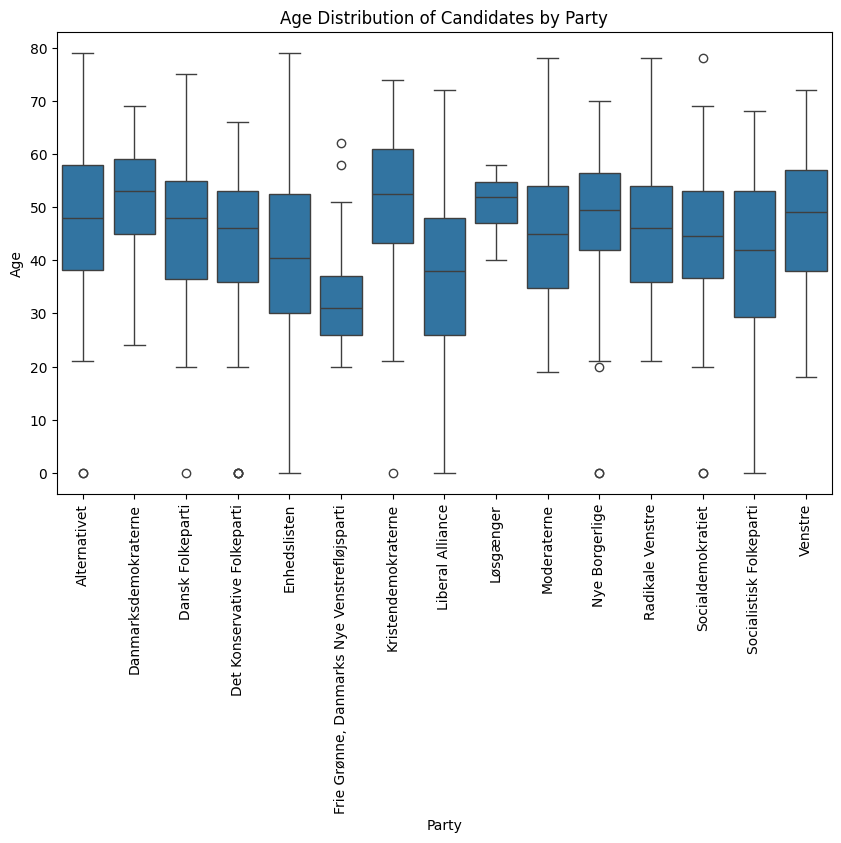

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for age distribution by party
plt.figure(figsize=(10, 6))
sns.boxplot(x='parti', y='alder', data=tv2data)
plt.title('Age Distribution of Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


It can be seen that there are outliers in some of the parties. The outliers are that the age is 0 which is not possible and probably is worng data.(There are also 18 years old candidates which based on the danish rules it is possible). We used the tv2 dataset because it has more candidates than the dr or alldata datasets. The fix could be to research the real age of the candidates or just setting it to the mean of the party.

In [5]:
tv2data[tv2data['alder'] < 18][['navn','alder']]

,navn,alder
62,Carsten Sohl,0
82,Sarah Roued Thomsen,0
141,Helene Brix Petersen,0
196,Roya Moore,0
209,Helle Bonnesen,0
235,Andreas Karlsen,0
246,Stine Pilt Olsen,0
302,David Schack Trappaud Rønne,0
303,Dorthe Hecht,0
333,Trine Pertou Mach,0


This is the list of all the outliers in the two datasets. Setting them to the mean of the party will be easier as they are only 16 which is a relatively small part of our dataset.

In the cell below, we will replace the outliers with a value of 0 in the dataset by the mean of their respective party. This helps to reduce skewness in the distribution.

In [6]:
candidates_with_zero_age = tv2data[tv2data['alder'] == 0]

mean_age_per_party = tv2data.groupby('parti')['alder'].mean()

for index, row in candidates_with_zero_age.iterrows():
    party = row['parti']
    mean_age = mean_age_per_party[party].round()
    tv2data.at[index, 'alder'] = mean_age

if tv2data[tv2data['alder'] == 0].empty:
    print("There are no candidates with age 0.")

There are no candidates with age 0.


### Bar chart of the Avarage Age of Candidates by Party

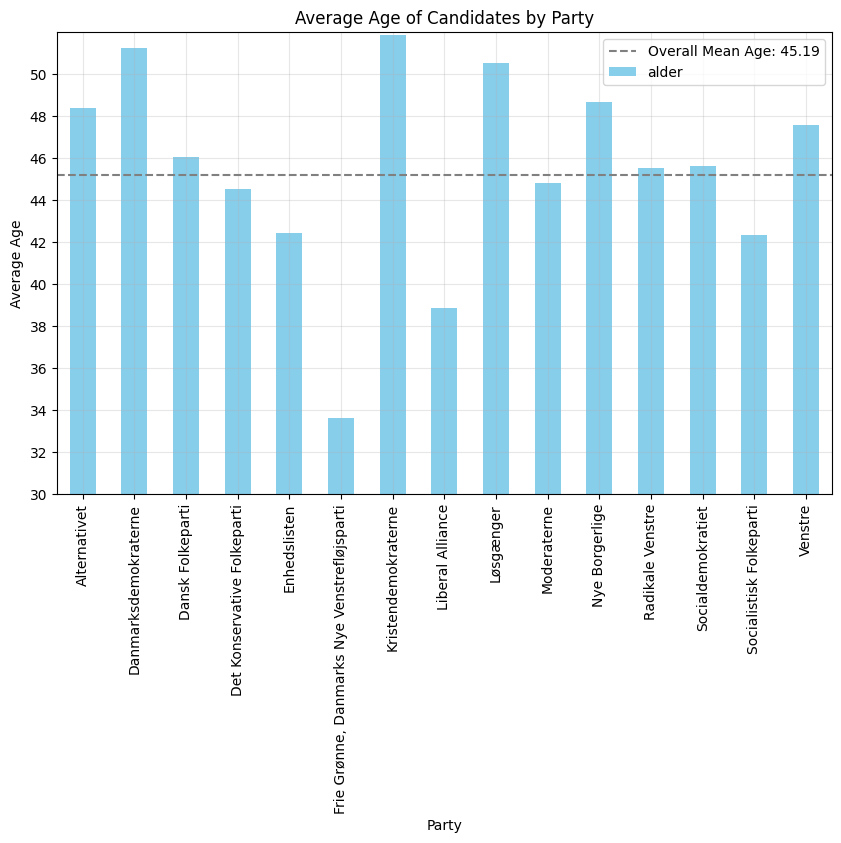

In [7]:
# Creating a bar plot for average age by party without outliers
tv2data_wo_age_outliers = tv2data[tv2data['alder'] > 18]

party_mean_age = tv2data_wo_age_outliers.groupby('parti')['alder'].mean()
tv2dataAgeMean = tv2data_wo_age_outliers['alder'].mean()

party_mean_age.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Age of Candidates by Party')
plt.grid(alpha=0.3)
plt.xlabel('Party')
plt.ylabel('Average Age')
plt.axhline(y=tv2dataAgeMean, color='gray', linestyle='--', label=f'Overall Mean Age: {tv2dataAgeMean:.2f}')
plt.yticks(range(30, 52, 2))
plt.ylim(30, 52)
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Calculate Confidence Scores for Each Candidate and show the ones that storngly agree and disagree

In [8]:
alldata_median = alldata.copy()
alldata_numeric_columns = alldata_median.select_dtypes(include=['number']).drop(columns='alder')

alldata_median['Median_answer'] = alldata_numeric_columns.median(axis=1)

strongly_agree = alldata_median[alldata_median['Median_answer'] == 2]
strongly_disagree = alldata_median[alldata_median['Median_answer'] == -2]

print(f"""Based on the median of the answers the candidates gave: 
      Number of candidates who strongly agree: {strongly_agree.shape[0]}
      Number of candidates who strongly disagree: {strongly_disagree.shape[0]}
""")

names = []

print("Strongly agree:")
for index, row in strongly_agree[['navn', 'Median_answer']].iterrows():
    print(f" - {row['navn']}, {row['Median_answer']}")
    names.append(row['navn'])

print("\nStrongly disagree:")
for index, row in strongly_disagree[['navn', 'Median_answer']].iterrows():
    print(f" - {row['navn']}, {row['Median_answer']}")
    names.append(row['navn'])


Based on the median of the answers the candidates gave: 
      Number of candidates who strongly agree: 3
      Number of candidates who strongly disagree: 3

Strongly agree:
 - Frank Sørensen, 2.0
 - Jesper Callesen, 2.0
 - Nicklas Gjedsig Larsen, 2.0

Strongly disagree:
 - Sarah Nørris, -2.0
 - Søren Vanting, -2.0
 - Steffen Sjørslev, -2.0


We chose the median (rather than the mean) because the median is more appropriate for Likert scale data, which is ordinal. The median helps identify the central tendency while avoiding the influence of extreme values (outliers) and skewing the results.

### Inter-Party Differences

We’ll calculate the mean response for each party across all questions, allowing us to compare ideological differences between parties.

In [9]:
alldata_groupby_party = alldata.drop(columns=['alder']).groupby('parti')

party_metrics = alldata_groupby_party.describe(include=np.number)

# using level 1 to go down the column hierarchy (i.e., the metrics)
party_mean_metrics = party_metrics.groupby(level=1, axis=1).mean()

party_mean_metrics

C:\Users\Dotev\AppData\Local\Temp\ipykernel_13908\3898940916.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  party_mean_metrics = party_metrics.groupby(level=1, axis=1).mean()


,25%,50%,75%,count,max,mean,min,std
parti,,,,,,,,
Alternativet,-0.285714,0.224490,0.795918,67.0,1.877551,0.215656,-1.673469,0.909648
Danmarksdemokraterne,-0.346939,-0.102041,0.040816,37.0,1.183673,-0.113072,-1.224490,0.608890
Dansk Folkeparti,-0.326531,0.163265,0.693878,49.0,1.693878,0.131195,-1.755102,0.888009
Det Konservative Folkeparti,-0.586735,-0.061224,0.418367,98.0,1.795918,-0.056851,-1.714286,0.887302
Enhedslisten,-0.244898,0.163265,0.403061,74.0,1.428571,0.095422,-1.510204,0.678929
"Frie Grønne, Danmarks Nye Venstrefløjsparti",-0.147959,0.132653,0.433673,26.0,1.040816,0.091837,-1.265306,0.667277
Kristendemokraterne,-0.387755,0.224490,0.862245,42.0,1.836735,0.181730,-1.816327,1.030463
Liberal Alliance,-0.612245,-0.163265,0.209184,70.0,1.489796,-0.163557,-1.469388,0.730710
Løsgænger,-0.693878,-0.102041,0.622449,3.0,1.346939,-0.013605,-1.285714,1.450230


Looking at the standard deviation (std) in the table, we can identify parties with significant internal disagreement. These include Løsgænger (std = 1.450230), Kristendemokraterne (std = 1.030463), and Dansk Folkeparti (std = 0.888009). The standard deviation measures how spread out the responses are within a party. A higher value indicates greater variation in opinions, signaling more disagreement among party members.

The mean helps us understand whether a party tends to be more positive or negative in its responses. A positive mean suggests a tendency toward more positive responses, while a negative mean points toward more negative ones. However, the mean alone may not always give a complete picture, especially in cases of high disagreement.

To get a clearer sense of the typical response within each party, we can look at the quartiles. The 50% quartile, or median, is particularly useful for understanding the central tendency of responses, as it is less affected by extreme values compared to the mean. The quartiles (25%, 50%, and 75%) show the spread of the middle 50% of responses, providing valuable insight into how opinions are distributed within each party.

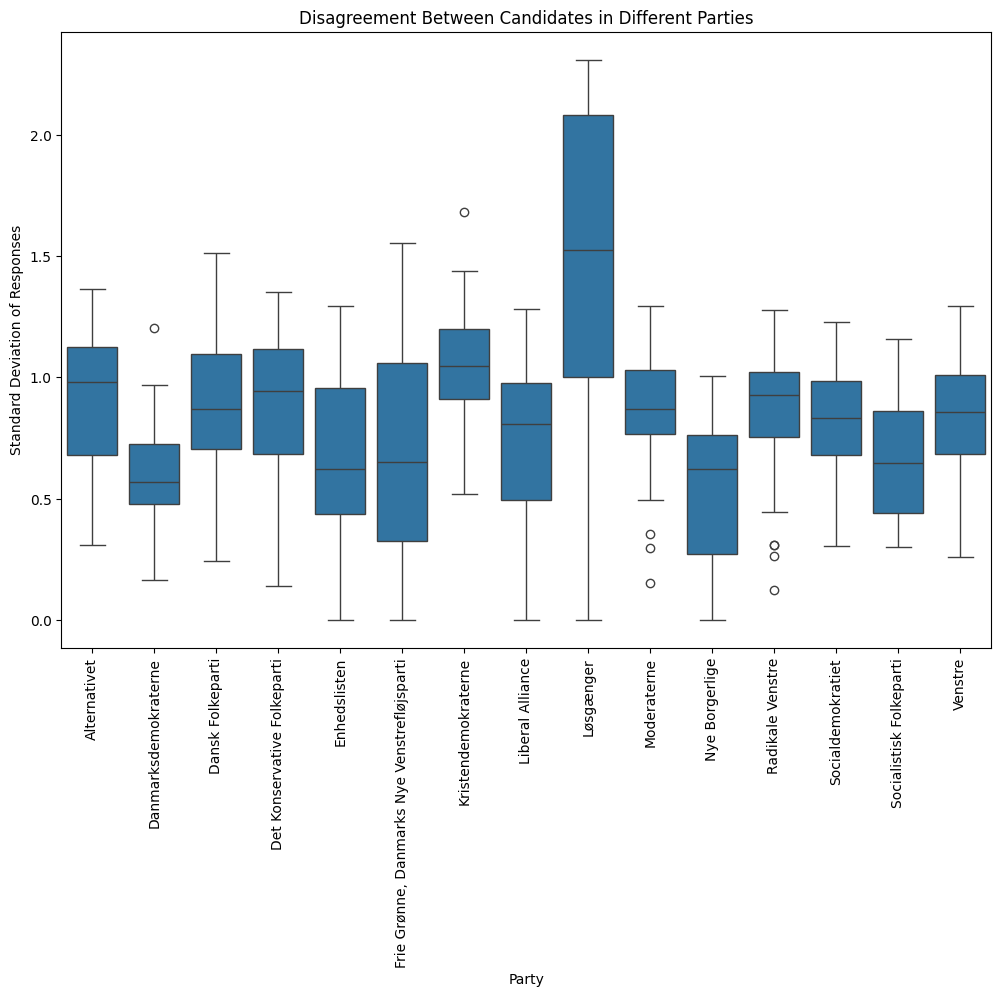

In [10]:
alldata_melted = alldata.drop(columns=["alder", "storkreds", 'navn']).melt(id_vars=['parti'], var_name='question', value_name='response')

candidate_std = alldata_melted.groupby(['parti', 'question'], as_index=False)['response'].std()

plt.figure(figsize=(12, 8))
sns.boxplot(x='parti', y='response', data=candidate_std)
plt.title('Disagreement Between Candidates in Different Parties')
plt.xlabel('Party')
plt.ylabel('Standard Deviation of Responses')
plt.xticks(rotation=90)
plt.show()

This boxplot gives further insight into the disagreement within different parties by visualizing the distribution of standard deviations. Parties with larger variability in responses include Løsgænger, which shows the highest disagreement, with a broad spread and significant internal variation. Other parties with noticeable disagreement are Kristendemokraterne and Dansk Folkeparti, with wide interquartile ranges and whiskers.

Several parties, such as Radikale Venstre, Nye Borgerlige, and Enhedslisten, display outliers, indicating that a few candidates within these parties deviate significantly from the majority opinion.

On the other hand, parties like Moderaterne, Danmarksdemokraterne, and Alternativet have narrower interquartile ranges, suggesting more consistency in their responses and lower internal disagreement.

In conclusion, creating a boxplot confirms some of our initial theories regarding internal party disagreement and additionally reveals outliers, which are harder to detect through other methods. 

### Intra-Party Differences

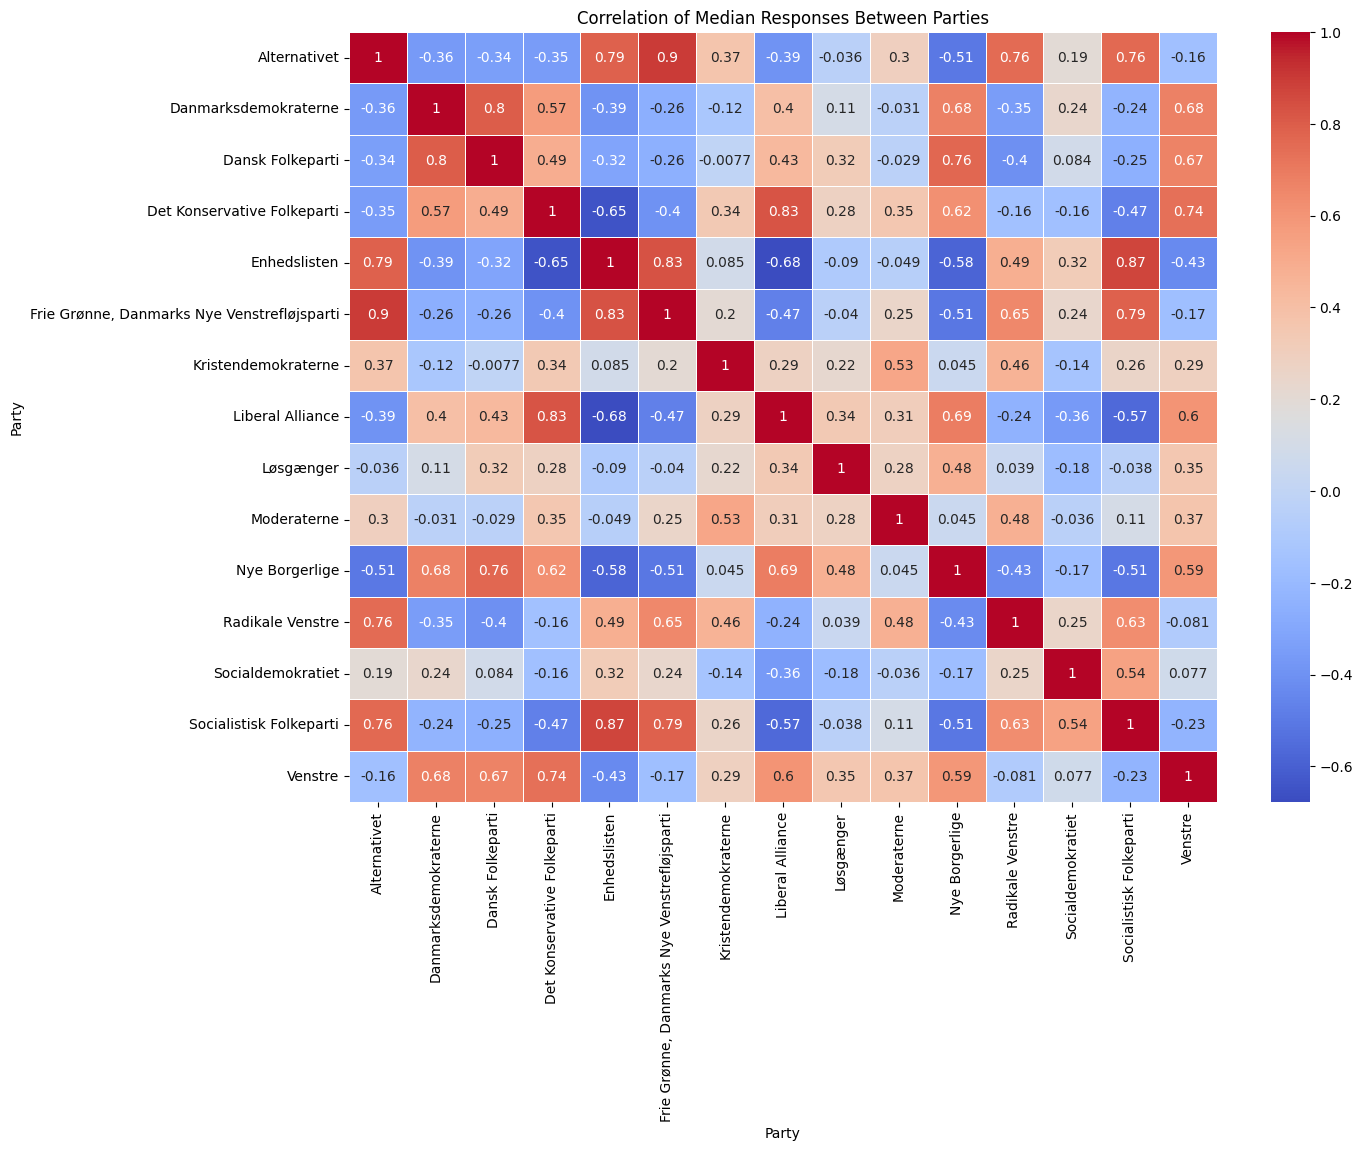

In [11]:
heatmap_data_median = alldata_melted.pivot_table(index='parti', columns='question', values='response', aggfunc='median')

# Using T to transpose the data so that the correlation is calculated between parties
correlation_matrix_median = heatmap_data_median.T.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_median, cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Correlation of Median Responses Between Parties')
plt.xlabel('Party')
plt.ylabel('Party')
plt.xticks(rotation=90)
plt.show()


The heatmap shows two main blocks: **left-leaning parties** like Socialistisk Folkeparti, Enhedslisten, and Radikale Venstre which have strong agreement with each other and a **right-leaning** parties like Det Konservative Folkeparti, Nye Borgerlige, and Liberal Alliance which also align closely. Can also be seen that Venstre and Kristendemokraterne are more **moderate**, showing weaker correlations with both sides. There is a clear polarization between the left and right, particularly with strong disagreement between Enhedslisten and the right-wing parties.

In [12]:
data = []
parties = alldata['parti'].unique()

for party in parties:
    count = alldata[alldata['parti'] == party]['parti'].count()
    countTV2 = tv2data[tv2data['parti'] == party]['parti'].count()
    countDR = drdata[drdata['parti'] == party]['parti'].count()
    data.append({'Combined samples': count, 'TV2 samples': countTV2, 'DR samples': countDR, 'party': party })

samples = pd.DataFrame(data)

samples_sorted = samples.sort_values(by='Combined samples', ascending=False)
samples_sorted.reset_index(drop=True, inplace=True)
samples_sorted

,Combined samples,TV2 samples,DR samples,party
0,98,99,99,Det Konservative Folkeparti
1,87,88,87,Socialdemokratiet
2,84,92,85,Venstre
3,74,78,77,Enhedslisten
4,70,81,79,Liberal Alliance
5,70,78,72,Socialistisk Folkeparti
6,67,71,70,Radikale Venstre
7,67,86,71,Alternativet
8,51,54,54,Nye Borgerlige
9,49,63,51,Dansk Folkeparti


Based on the result we can see that Løsgænger has very small number of samples (candidates) in the combined set compared to the other parties. We can also see that a more candidates from the different parties has participated in the TV2 quiz rather than the DR one. The small amount of samples in the combined dataset could make it impossible for the model to generalize for this party. In this case we can resample, use only one of the datasets or do nothing.

### Training Models

##### Handling Class Imbalance:
SMOTE (Synthetic Minority Over-sampling Technique) is used to handle the class imbalance in the dataset. Some political parties (e.g., Løsgænger or smaller parties) may have very few candidates in the dataset compared to larger parties like "Venstre" or "Socialdemokratiet." Without handling this imbalance, the models could be biased toward predicting the majority class more often.

By applying SMOTE, the models are trained on a more balanced dataset, which ensures they are better at predicting minority party affiliations. The models are expected to show how well they can balance accuracy across different parties.

Confusion matrices or classification reports (which show precision, recall, and F1 scores) can also be included to evaluate how well the models are performing on minority classes (parties with fewer candidates) but they will not be utilized as the dataset is not very big.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# define reusable evaluation normal function
def fit_eval(model, X_train, y_train, X_val, y_val, X_test, y_test, y_pred_test_return=False):

    # fit the model first
    model.fit(X_train, y_train)

    # predict on both train and test
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # calculate train and test accuracies
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    if y_pred_test_return:
        return model, val_acc, test_acc, y_test_pred
    else:
        return model, val_acc, test_acc

In [14]:
# Prepare the data for training and testing
X = alldata.drop(columns=['navn', 'parti', 'storkreds', 'alder'])
y = alldata['parti']

# Trying resampling with SMOTE
smote = SMOTE(k_neighbors=2, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_val_resampled, X_test_resampled, y_train_val_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(X_train_val_resampled, y_train_val_resampled, test_size=0.2, random_state=42)

# Split the original data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)


In [15]:
param_grid = {
       'max_depth': [7, 9, 11, 13],
       'min_samples_split': [2, 4, 6]
}

# Train a Decision Tree Classifier with normal data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_cv2 = GridSearchCV(decision_tree, param_grid, cv=2, n_jobs=-1)
decision_tree = GridSearchCV(decision_tree, param_grid, cv=5, n_jobs=-1)


print("\033[1m Decision Tree Classifier \033[0m")
# Fit and evaluate the model with resampled data
decision_tree_resampled, dt_val_accuracy_resampled, dt_test_accuracy_resampled = fit_eval(decision_tree, X_train_resampled, y_train_resampled, X_val_resampled, y_val_resampled, X_test_resampled, y_test_resampled)
print('Best parameters Resampled:', decision_tree_resampled.best_params_)
print('Decision Tree with resampled data Accuracy (val / test):', dt_val_accuracy_resampled, '/', dt_test_accuracy_resampled)

# Fit and evaluate the model with normal data
decision_tree_normal, dt_val_accuracy, dt_test_accuracy = fit_eval(decision_tree_cv2, X_train, y_train, X_val, y_val, X_test, y_test)
print('Best parameters Normal:', decision_tree_normal.best_params_)
print('Decision Tree with normal data Accuracy (val / test):', dt_val_accuracy, '/', dt_test_accuracy)

 Decision Tree Classifier 
Best parameters Resampled: {'max_depth': 11, 'min_samples_split': 4}
Decision Tree with resampled data Accuracy (val / test): 0.8050847457627118 / 0.8333333333333334
Best parameters Normal: {'max_depth': 11, 'min_samples_split': 2}
Decision Tree with normal data Accuracy (val / test): 0.7266187050359713 / 0.6954022988505747


We can see that resampling the 3 samples yielded good results. The cross-validation scores and the small gap between the validation and test set accuracies suggest that the model is not overfitting.

We also tested the model without resampling, which resulted in slightly lower but still acceptable performance. However, we are somewhat concerned that the model might be underfitting for the Løsgænger party, potentially due to low representation in the data.

Next, we will explore using only the TV2 dataset to see how that affects the results.

In [16]:
X_tv2 = tv2data.select_dtypes(include=[np.number]).drop(columns=['alder'])
y_tv2 = tv2data['parti']

X_tv2_train_val, X_tv2_test, y_tv2_train_val, y_tv2_test = train_test_split(X_tv2, y_tv2, test_size=0.2, stratify=y_tv2, random_state=42)
X_tv2_train, X_tv2_val, y_tv2_train, y_tv2_val = train_test_split(X_tv2_train_val, y_tv2_train_val, test_size=0.2, stratify=y_tv2_train_val, random_state=42)

X_dr = drdata.select_dtypes(include=[np.number])
y_dr = drdata['parti']

X_dr_train_val, X_dr_test, y_dr_train_val, y_dr_test = train_test_split(X_dr, y_dr, test_size=0.2, stratify=y_dr, random_state=42)
X_dr_train, X_dr_val, y_dr_train, y_dr_val = train_test_split(X_dr_train_val, y_dr_train_val, test_size=0.2, stratify=y_dr_train_val, random_state=42)

print(X_tv2.columns)
print(X_dr.columns)

Index(['1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b',
       '7a', '7b', '8a', '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a',
       '12b'],
      dtype='object')
Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563'],
      dtype='object')


In [17]:
decision_tree_tv2, dt_val_accuracy_tv2, dt_test_accuracy_tv2, y_test_pred_tv2 = fit_eval(decision_tree_cv2, X_tv2_train, y_tv2_train, X_tv2_val, y_tv2_val, X_tv2_test, 
                                                                                         y_tv2_test, y_pred_test_return=True)

decision_tree_dr, dt_val_accuracy_dr, dt_test_accuracy_dr = fit_eval(decision_tree_cv2, X_dr_train, y_dr_train, X_dr_val, y_dr_val, X_dr_test, y_dr_test)

decision_tree_ensemble = VotingClassifier(estimators=[('dt_tv2', decision_tree_tv2), ('dt_dr', decision_tree_dr)], voting='soft')

decision_tree_ensemble, dt_val_accuracy_ensemble, dt_test_accuracy_ensemble = fit_eval(decision_tree_ensemble, X_train, y_train, X_val, y_val, X_test, y_test)

print("\033[1m Decision Tree Classifier Ensemble \033[0m")
print('Decision Tree Ensemble Accuracy (val / test):', dt_val_accuracy_ensemble, '/', dt_test_accuracy_ensemble)

print("\033[1m Decision Tree Classifier TV2 \033[0m")
print('Decision Tree TV2 Accuracy (val / test):', dt_val_accuracy_tv2, '/', dt_test_accuracy_tv2)

print("\033[1m Decision Tree Classifier DR \033[0m")
print('Decision Tree DR Accuracy (val / test):', dt_val_accuracy_dr, '/', dt_test_accuracy_dr)

 Decision Tree Classifier Ensemble 
Decision Tree Ensemble Accuracy (val / test): 0.7266187050359713 / 0.6954022988505747
 Decision Tree Classifier TV2 
Decision Tree TV2 Accuracy (val / test): 0.5909090909090909 / 0.6580310880829016
 Decision Tree Classifier DR 
Decision Tree DR Accuracy (val / test): 0.7379310344827587 / 0.7071823204419889


Training two decision trees with the different dataset and then using the Voting Classifier to combine them gave us the same result as using the alldata dataset and training a decision tree.

In [18]:
# da predstawim dt sas razlichnite rezultati i da reshim che shte e resampling

print("\033[1m Results from the different decision trees \033[0m")
print('Decision Tree with normal data Accuracy (val / test):', dt_val_accuracy, '/', dt_test_accuracy)
print('Decision Tree with resampled data Accuracy (val / test):', dt_val_accuracy_resampled, '/', dt_test_accuracy_resampled)
print('Decision Tree ensemble Accuracy (val / test):', dt_val_accuracy_ensemble, '/', dt_test_accuracy_ensemble)

 Results from the different decision trees 
Decision Tree with normal data Accuracy (val / test): 0.7266187050359713 / 0.6954022988505747
Decision Tree with resampled data Accuracy (val / test): 0.8050847457627118 / 0.8333333333333334
Decision Tree ensemble Accuracy (val / test): 0.7266187050359713 / 0.6954022988505747


From this we can see that the resampled model performs best as the other two have same result. It seems like the model is not overfitting as the gap between validation and test accuracy is relatively small, so the next models will be trained on the resampled data.

In [19]:
param_grid = {
       'n_estimators': [150, 250, 350],
       'max_depth': [3, 5, 7],
       'min_samples_split': [2, 4, 6]
}

# Train a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1)

# Fit and evaluate the model with resampled data
random_forest_resampled, rf_val_accuracy_resampled, rf_test_accuracy_resampled = fit_eval(random_forest, X_train_resampled, y_train_resampled, 
                                                                                          X_val_resampled, y_val_resampled, X_test_resampled, y_test_resampled)

print("\033[1m Random Forest Classifier \033[0m")
print('Best parameters:', random_forest_resampled.best_params_)
print('Random Forest with resampled data Accuracy (val / test):', rf_val_accuracy_resampled, '/', rf_test_accuracy_resampled)


 Random Forest Classifier 
Best parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 250}
Random Forest with resampled data Accuracy (val / test): 0.923728813559322 / 0.9319727891156463


In [20]:
# init gradient boosted trees with small hyperparameter grid search
param_grid = {
       'learning_rate': [0.05, 0.075, 0.1],
       'n_estimators': [250, 350, 450],
       'max_depth': [1, 3, 5],
       'min_samples_split': [2, 4, 6]
}
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=7)
gradient_boosting = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# evaluate performance
gradient_boosting, gradient_boosting_train_acc, gradient_boosting_test_acc = fit_eval(gradient_boosting, X_train_resampled, y_train_resampled, 
                                                                                      X_val_resampled, y_val_resampled, X_test_resampled, y_test_resampled)

# output
print('Best parameters:', gradient_boosting.best_params_)
print('Gradient Boosted Accuracy (train / test):', gradient_boosting_train_acc, '/', gradient_boosting_test_acc)

Best parameters: {'learning_rate': 0.075, 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 350}
Gradient Boosted Accuracy (train / test): 0.9491525423728814 / 0.9489795918367347


In [21]:
# Train a Logistic Regression Classifier
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression, lr_val_accuracy, lr_test_accuracy = fit_eval(logistic_regression, X_train_resampled, y_train_resampled, 
                                                                  X_val_resampled, y_val_resampled, X_test_resampled, y_test_resampled)

print("\033[1m Logistic Regression \033[0m")
print('Logistic Regression Accuracy (val / test):', lr_val_accuracy, '/', lr_test_accuracy)

 Logistic Regression 
Logistic Regression Accuracy (val / test): 0.923728813559322 / 0.9455782312925171


In [26]:
# Find the best n_neighbors through a loop
best_n = 0
best_knn_val_accuracy = 0
best_knn_test_accuracy = 0
best_metric = ''
best_knn = None

for n in range(3, 21):
    for metric in ['euclidean', 'manhattan', 'chebyshev']:
        knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
        knn, val_accuracy_knn, test_accuracy_knn = fit_eval(knn, X_train_resampled, y_train_resampled, X_val_resampled, y_val_resampled, X_test_resampled, y_test_resampled)
        if val_accuracy_knn > best_knn_val_accuracy:
            best_knn_val_accuracy = val_accuracy_knn
            best_knn_test_accuracy = test_accuracy_knn
            best_n = n
            best_metric = metric
            best_knn = knn

print("\033[1m KNN Classifier \033[0m")
print(f"Best n_neighbors: {best_n} and metric: {best_metric} with validation accuracy: {best_knn_val_accuracy:.2f}")


print('KNN Accuracy (val / test):', best_knn_val_accuracy, '/', best_knn_test_accuracy)

 KNN Classifier 
Best n_neighbors: 5 and metric: euclidean with validation accuracy: 0.93
KNN Accuracy (val / test): 0.9279661016949152 / 0.9387755102040817


In [30]:
print(f"""\033[1m Results from the different classifiers \033[0m
Decision Tree with resampled data Accuracy (val / test): {dt_val_accuracy_resampled:.15f} / {dt_test_accuracy_resampled:.15f}
Random Forest with resampled data Accuracy (val / test): {rf_val_accuracy_resampled:.15f} / {rf_test_accuracy_resampled:.15f}
Gradient Boosted Accuracy (train / test):                {gradient_boosting_train_acc:.15f} / {gradient_boosting_test_acc:.15f}
Logistic Regression Accuracy (val / test):               {lr_val_accuracy:.15f} / {lr_test_accuracy:.15f}
KNN Accuracy (val / test):                               {best_knn_val_accuracy:.15f} / {best_knn_test_accuracy:.15f}""")

 Results from the different classifiers 
Decision Tree with resampled data Accuracy (val / test): 0.805084745762712 / 0.833333333333333
Random Forest with resampled data Accuracy (val / test): 0.923728813559322 / 0.931972789115646
Gradient Boosted Accuracy (train / test):                0.949152542372881 / 0.948979591836735
Logistic Regression Accuracy (val / test):               0.923728813559322 / 0.945578231292517
KNN Accuracy (val / test):                               0.927966101694915 / 0.938775510204082
